### Black Friday Dataset EDA And Feature Engineering

### Cleaning and preparing the data for model training

In [54]:
#importing related libraries
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Problem statement:

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#interpretation: to build a model to predict the purchasing capacity of the customer

#importing the dataset
df_train=pd.read_csv('train.csv',skipinitialspace=True) ##giving skipinitialspace as while mapping, the given value is NaN
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
##  import the test data
df_test=pd.read_csv('test.csv',skipinitialspace=True)
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
##MErge both train and test data
df=df_train.append(df_test) #sort by default is false
#or df = pd.concat([df_train, df_test], ignore_index=True)
#or df= df_train.merge(df_test) 
df.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [5]:
##getting information from the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [7]:
#as we will not be using user_id, dropping
df.drop(['User_ID'],axis=1,inplace=True)  #axis=1 meaning column, inplace =true --automatically replaces df with this value

In [8]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [9]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1}) #map function assigns the value
df.head()

#or can drop the value and replace it with 1 and 0
#df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [10]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#pd.get_dummies(df['Age'],drop_first=True)----not work as we need the model to categorize in order and it would understand and we can train/test better
#target ordinal encoding
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

##second technqiue
from sklearn import preprocessing
 
#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
#Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

In [12]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [13]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [14]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [15]:
df=pd.concat([df,df_city],axis=1) #when concat-giving axis-1 as it's column. if 0-row
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [16]:
##drop City Category Feature as it is not required
df.drop('City_Category',axis=1,inplace=True)

Dealing with missing values

In [17]:
## Missing Values
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
B                                  0
C                                  0
dtype: int64

In [18]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [19]:
## Focus on replacing missing values
df['Product_Category_2'].unique() #discrete feature=replace it with mode. cuz mean will create anew category altogether

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
df['Product_Category_2'].mode()[0]

8.0

In [22]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isnull().sum() #confirming for replacement

0

In [24]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [26]:
df['Product_Category_3'].mode()[0]

16.0

In [27]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [28]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4+,0,1


In [29]:
df.shape

(783667, 12)

In [30]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [32]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [34]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int) #as this is int value when observed and can be used to draw obseravtions
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.3+ MB


In [35]:
df['B']=df['B'].astype(int) #unit6-8 bit unassigned integre ranging from 0 to 255
df['C']=df['C'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


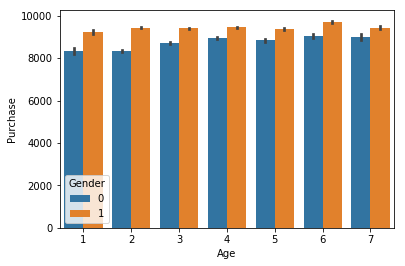

In [37]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=df)

observation: age vs purchase for different gender
            F=0:lesser purchase percentage
            M=1:more purchase percentage
            
            The purchasing is almost uniform in all age groups



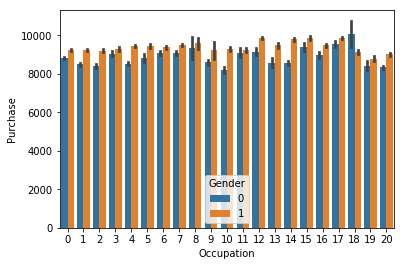

In [38]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

almost uniform purchase with respect to different occupation

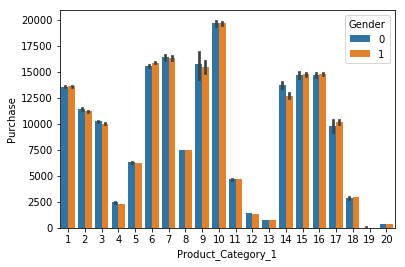

In [39]:
#purchase with prod_cat_1
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

obseravtion: highest value of purchase is 20,000.
The difference in generating pruchasing power is similar to both M and F

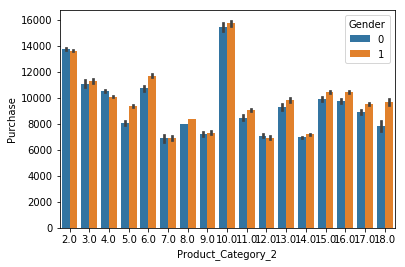

In [40]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

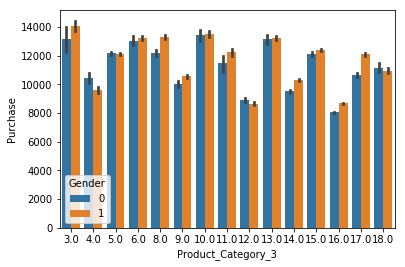

In [41]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [42]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [43]:
##Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [44]:
df_train=df[~df['Purchase'].isnull()] #is not null

In [45]:
X=df_train.drop('Purchase',axis=1)

In [46]:
X.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,4,0,1


In [47]:
X.shape

(550068, 11)

In [48]:
y=df_train['Purchase']

In [49]:
y.shape

(550068,)

In [50]:
y


0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
5         15227.0
6         19215.0
7         15854.0
8         15686.0
9          7871.0
10         5254.0
11         3957.0
12         6073.0
13        15665.0
14         5378.0
15         2079.0
16        13055.0
17         8851.0
18        11788.0
19        19614.0
20         8584.0
21         9872.0
22         9743.0
23         5982.0
24        11927.0
25        16662.0
26         5887.0
27         6973.0
28         5391.0
29        16352.0
           ...   
550038      596.0
550039      595.0
550040       26.0
550041      488.0
550042      243.0
550043       48.0
550044       62.0
550045      252.0
550046      236.0
550047      244.0
550048      591.0
550049      473.0
550050      368.0
550051      489.0
550052      239.0
550053      371.0
550054       60.0
550055      238.0
550056      254.0
550057       61.0
550058      121.0
550059       48.0
550060      494.0
550061      599.0
550062    

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)#train test data split

In [52]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [53]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


train the model

checking for train dataset and comparing the accuracy fit for test and train data using
1. linear regression
2. DecisionTree
3. Random forest

4.Gradient boost regressor

In [71]:
from sklearn.linear_model import LinearRegression


In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [76]:
fit1 = lr.fit(X_train,y_train)#Here we fit training data to linear regressor
fit2 = dtr.fit(X_train,y_train)#Here we fit training data to Decision Tree Regressor
fit3 = rfr.fit(X_train,y_train)#Here we fit training data to Random Forest Regressor
fit4 = gbr.fit(X_train,y_train)#Here we fit training data to Gradient Boosting Regressor

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
print("Accuracy Score of Linear regression on train set",fit1.score(X_train,y_train)*100)
print("Accuracy Score of Decision Tree on train set",fit2.score(X_train,y_train)*100)
print("Accuracy Score of Random Forests on train set",fit3.score(X_train,y_train)*100)
print("Accuracy Score of Gradient Boosting on train set",fit4.score(X_train,y_train)*100)


Accuracy Score of Linear regression on train set 13.210555628187514
Accuracy Score of Decision Tree on train set 79.83631647792538
Accuracy Score of Random Forests on train set 78.01092236290572
Accuracy Score of Gradient Boosting on train set 64.96087814238753


In [79]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,y_test)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,y_test)*100)
print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,y_test)*100)

Accuracy Score of Linear regression on test set 12.948768560712399
Accuracy Score of Decision Tree on test set 55.82245084885891
Accuracy Score of Random Forests on test set 61.97781896178442
Accuracy Score of Gradient Boosting on testset 64.44959838731027


Accuracy for train data:

it can be observed that the accuracy score for random forests and decision tree is comparable(79.83 and 78/01), and better with relevance to linear regression and gradient boosting. 

Accuracy for test data:

For test data Gradient boost has the highest accuracy score of 64.44, followed up by random forests of 61.97.

Conclusion:
With reference to test and train data, Random forsts can be chosen for this particular dataset for better fit model.
